<a href="https://colab.research.google.com/github/mhtattersall/Dask/blob/main/Try_it_22_2_students.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Try-It Activity 22.2: Running Parallel Operations using DASK

Learning Outcome Addressed:
1. Run parallel operations in DASK.

The DASK *library* in Python allows you to take advantage of how computers are set up with multiple cores to run *threads* in parallel. In this try-it activity, you will practice using Python’s DASK *library* to run *threads* in parallel.

This try-it activity will help you to analyze the performance gains realized by running *threads* in parallel. First, you will run *functions* sequentially. Then, you will run the same *functions* in parallel. Finally, you will compare performances for both cases.

The code below are *functions* to `add` two numbers and `inc` a number by 1. Note that the two *functions* have `sleep(1)` which instructs the *function* to delay for one second. The `sleep` *function* is used here to simulate a long running program.

In [1]:
from time import sleep

def inc(x):
    sleep(1)
    return x + 1

def add(x, y):
    sleep(1)
    return x + y

1. Execute the code below using the `%%time` *function* to see how fast the *functions* run when they are run sequentially:

In [2]:
%%time
# Running the functions sequentially

x = inc(1)
y = inc(2)
z = add(x, y)


CPU times: user 15.6 ms, sys: 1.68 ms, total: 17.3 ms
Wall time: 3 s


2. You can use DASK to run the *functions* in parallel. This is done by adding the `delayed` *decorator* to the *function*. First, import the `delayed` *decorator*:

In [3]:
from dask import delayed

3. Add the `delayed` *decorator* to the *function* call. Run the code below to find out if there are any improvements in the execution of the *functions* when running them in parallel.

In [4]:
%%time
# Running the functions in parallel

x = delayed(inc)(1)
y = delayed(inc)(2)
x_add_y = delayed(add)(x, y)

CPU times: user 496 µs, sys: 89 µs, total: 585 µs
Wall time: 535 µs


4. Next, you need to call the `compute` *function* on the `x_add_y` variable to get the value of `z`. Run the code below to compute the value of `z`, use the `%%time` *function* to find out how fast the execution is, and *print* the value of `z`.

In [5]:
%%time
z = x_add_y.compute()
print(z)

5
CPU times: user 546 ms, sys: 66 ms, total: 612 ms
Wall time: 2.92 s


5. Then, call the `visualize` *function* on the `x_add_y` object to see how DASK runs the two `inc` *functions* in parallel.

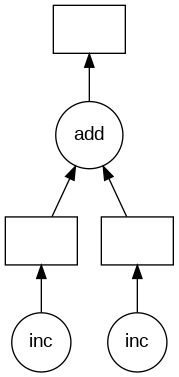

In [6]:
x_add_y.visualize()

The code below defines three *functions*: `double` which doubles a number, `is_even` that returns true or false if a number is even, and `inc` which increases a number by 1.

In [7]:
def double(x):
    sleep(1)
    return 2 * x

def is_even(x):
    return not x % 2

def inc(x):
    sleep(1)
    return x + 1

6. The code below *loops* through a *list* of numbers and performs the following computation:

If a number in the *list* is even, then the value is doubled. Otherwise, the value is incremented by one. The code then sums all the numbers that were computed. Complete the code below to see how long it takes for the code to be executed sequentially.

In [9]:
%%time
# Sequential code

data = [1,2,3,4,5,6,7,8,9,10]

results = []
for x in data:
    if is_even(x):
        y = double(x)
    else:
        y = inc(x)
    results.append(y)

total = sum(results)
print(total)

90
CPU times: user 53 ms, sys: 3.2 ms, total: 56.2 ms
Wall time: 10 s


7. Complete the code and add the `delayed` *decorator* to the *function* calls to run the *functions* in parallel:

In [11]:
results = []
for x in data:
    if is_even(x):  # even
        y = delayed(double)(x)
    else:          # odd
        y = delayed(inc)(x)
    results.append(y)

total = delayed(sum)(results)

8. Complete the code below to run the `compute()` *function* on the total variable. Also, use the `%%time` *function* to analyze how long it look to run the *functions* in parallel.

In [12]:
%%time
total.compute()

CPU times: user 30.3 ms, sys: 4.58 ms, total: 34.9 ms
Wall time: 5.01 s


90

9. Now complete the code below and call the `visualize()` *function* to see a graphical representation of how DASK created multiple *threads* for the different *functions* (`double` and `inc`) to obtain the sum.

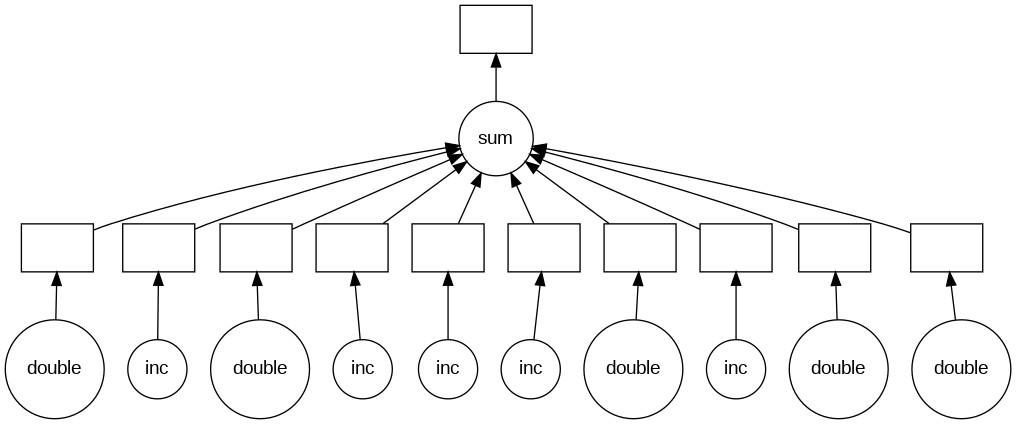

In [13]:
total.visualize()